### 过程式的代码

```python
#configure the data to start with
collection = get_initial_state()
state_var = None
    for datum in data_set:
        if condition(state_var):
            state_var = calculate_from(datum)
            new = modify(datum, state_var)
            collection.add_to(new)
        else:
            new = modify_differently(datum)
            collection.add_to(new)
#Now actually work with the data
for thing in collection:
    process(thing)
```

### 一个例子
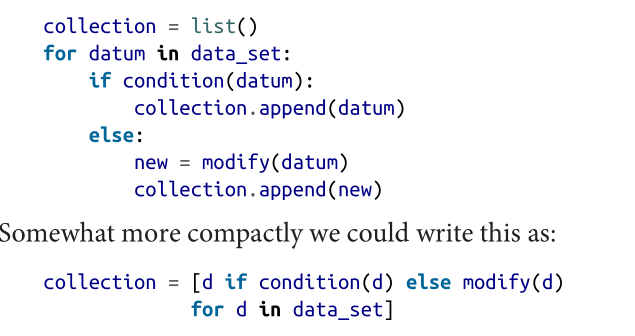

In [1]:
def quicksort(lst):
    if len(lst) == 0:
        return lst
    pivot = lst[0]
    pivots = [x for x in lst if x == pivot]
    small = quicksort([x for x in lst if x < pivot])
    large = quicksort([x for x in lst if x > pivot])
    return small + pivots + large

In [2]:
quicksort([2,3,1,18,7,3,25,35,13,2.5])

[1, 2, 2.5, 3, 3, 7, 13, 18, 25, 35]

In [3]:
# 用lamdba的一个示例代码
do_it  = lambda f, *args: f(*args)
hello = lambda first, last: print("Hello", first, last)
bye = lambda first, last: print("Bye", first, last)
_ = list(map(do_it, [hello, bye], ['David','Jane'], ['Mertz', 'Doe']))

Hello David Mertz
Bye Jane Doe


In [5]:
# 用lamdba的一个示例代码
do_it  = lambda f, *args: f(*args)
hello = lambda first, last: print("Hello", first, last)
bye = lambda first, last: print("Bye", first, last)
_ = list(map(do_it, [hello, bye], ['David'], ['Mertz']))

Hello David Mertz


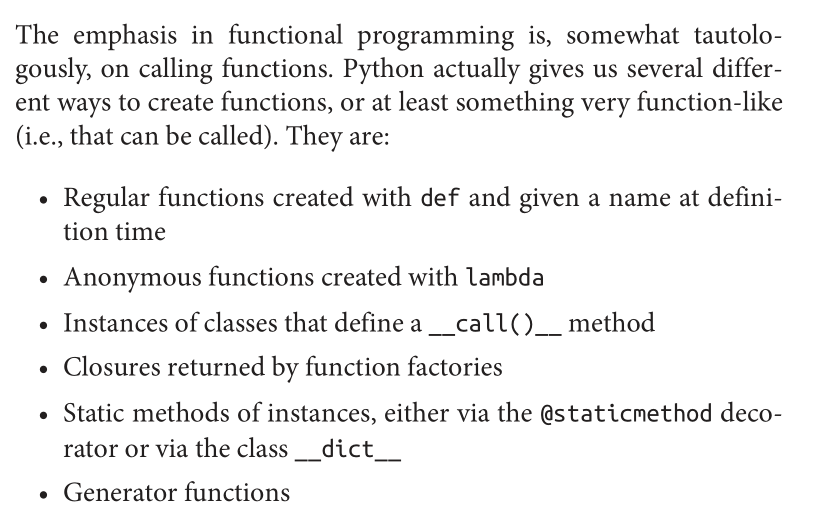

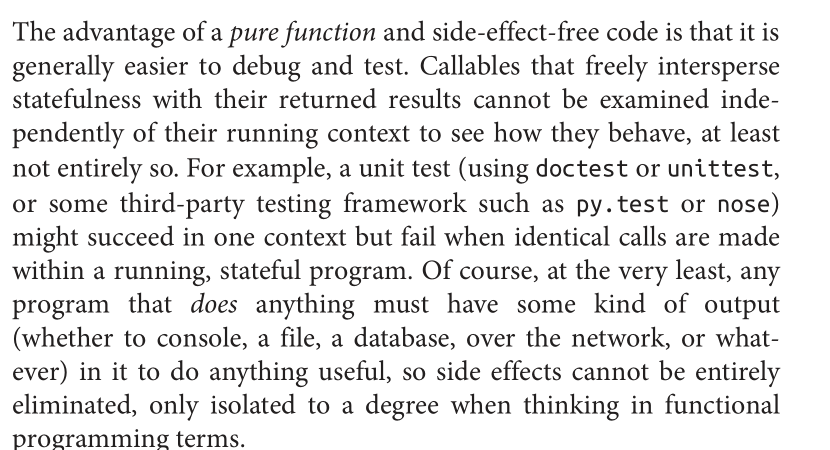

In [5]:
class Adder:
    def __init__(self, n):
        self.n = n
    def __call__(self, m):
        return self.n + m

In [6]:
add5_i = Adder(5)
add5_i.n

5

In [9]:
def make_adder(n):
    def adder(m):
        return m + n
    return adder
add5_f = make_adder(5)

In [10]:
add5_f(5)

10

In [11]:
adders = []
for n in range(5):
    adders.append(lambda m: m+n)

In [13]:
[adder(10) for adder in adders]

[14, 14, 14, 14, 14]

In [14]:
n = 10
[adder(10) for adder in adders]

[20, 20, 20, 20, 20]

In [16]:
adders = []
for n in range(5):
    adders.append(lambda m, n = n: m+n)
[adder(10) for adder in adders]

[10, 11, 12, 13, 14]

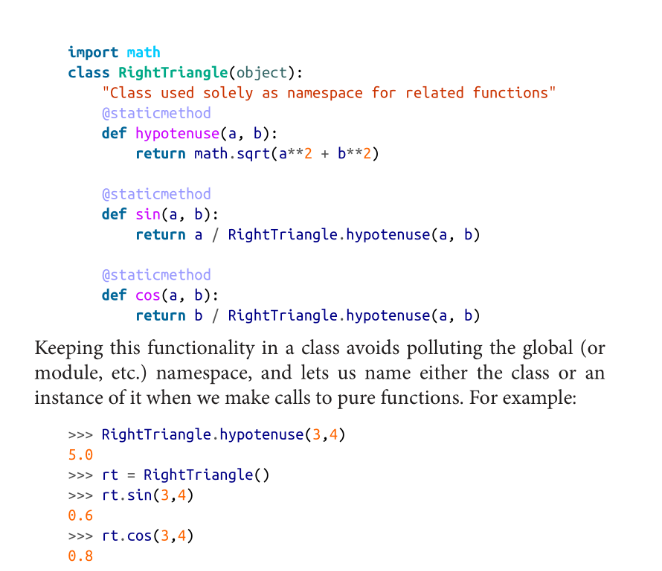

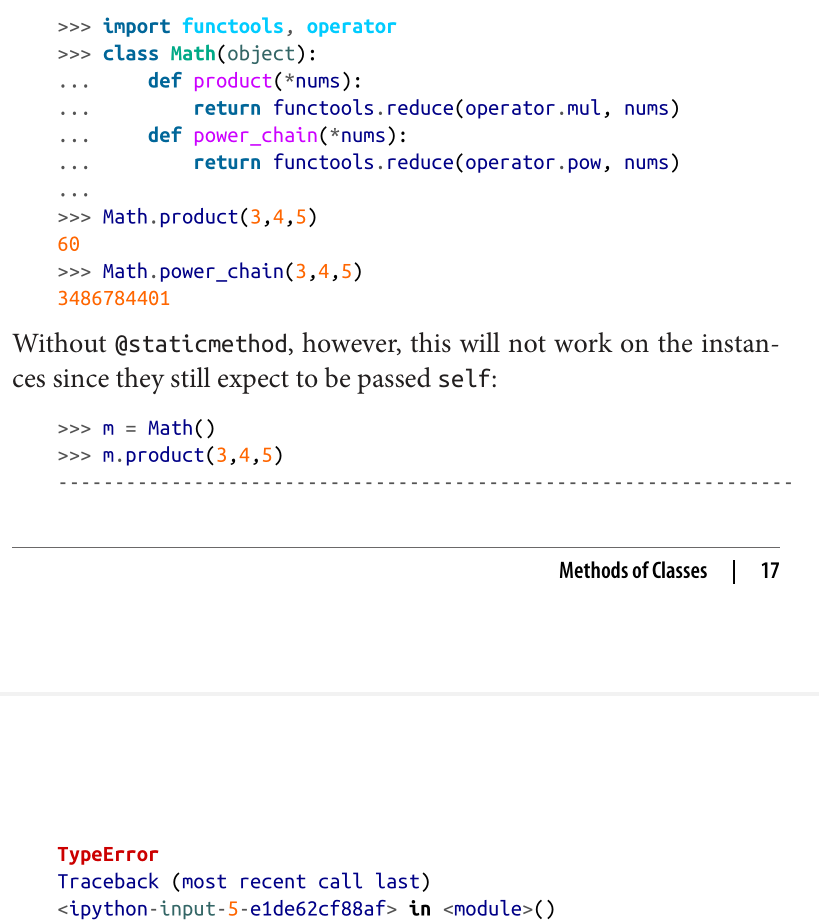

In [2]:
def get_primes():
    candidate = 2
    found = []
    while True:
        if all(candidate % prime != 0 for prime in found):
            yield candidate
            found.append(candidate)
        candidate += 1

In [18]:
primes = get_primes()

In [19]:
primes

<generator object get_primes at 0x00000223FE1B17C8>

In [20]:
next(primes)

2

In [21]:
next(primes),next(primes)

(3, 5)

**lazy evaluation**

In [5]:
from collections.abc import Sequence
class ExpandingSequence(Sequence):
    def __init__(self, it):
        self.it = it
        self._cache = []
    def __getitem__(self, index):
        while len(self._cache) <= index:
            self._cache.append(next(self.it))
        return self._cache[index]
    def __len__(self):
        return len(self._cache)

In [6]:
primes = ExpandingSequence(get_primes())

In [7]:
primes[100]

547

**Higher-Order Functions**

In [8]:
def compose(*funcs):
    """
    compose(f,g,...) == f(g...(x))
    """
    def inner(data, funcs = funcs):
        result = data
        for f in reversed(funcs):
            result = f(result)
        return result
    return inner

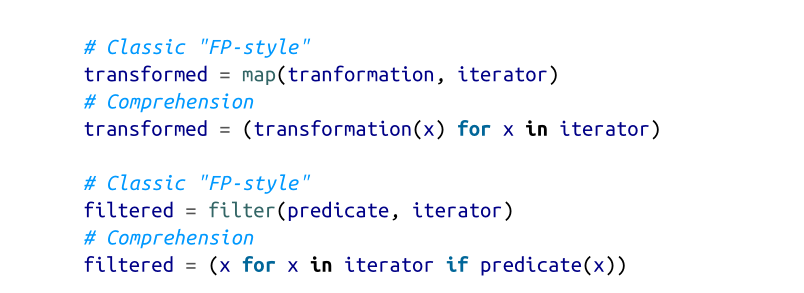

In [96]:
data = [True for i in range(1000)]
def changeState(st):
    return bool(1-st)
def epochchange(epoch):
    def _change(state):
        copy = state.copy()
        copy[epoch::epoch+1] = list(map(changeState, copy[epoch::epoch+1]))
        return copy
    return _change
transformation = [epochchange(i) for i in range(500)]


In [97]:
f = compose(*transformation)

In [98]:
f(data)

[False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 T

In [99]:
data

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

SyntaxError: can't use starred expression here (<ipython-input-64-63179bdb9a80>, line 4)